In [37]:
#!pip install citipy

In [38]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [39]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [40]:
Weather_Data = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
weather_api_key = ""
Final_Url = f" {Weather_Data}appid={weather_api_key}&units={units}&q="
Library_Extract = requests.get(Final_Url+"Kansas").json()
display(Library_Extract)
print (Final_Url)

{'coord': {'lon': -98.5006, 'lat': 38.5003},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 58.06,
  'feels_like': 42.35,
  'temp_min': 57.2,
  'temp_max': 59,
  'pressure': 1001,
  'humidity': 72},
 'visibility': 10000,
 'wind': {'speed': 27.63, 'deg': 160, 'gust': 35.68},
 'clouds': {'all': 1},
 'dt': 1614469994,
 'sys': {'type': 1,
  'id': 4181,
  'country': 'US',
  'sunrise': 1614431323,
  'sunset': 1614471897},
 'timezone': -21600,
 'id': 4273857,
 'name': 'Kansas',
 'cod': 200}

 http://api.openweathermap.org/data/2.5/weather?appid=59c6594aff7fffe15cdf209762c4ba83&units=imperial&q=


In [41]:
Empty_List = []
Set = 0
for city in cities:
    Library_Extract = requests.get(Final_Url+city).json()
    #display(Library_Extract)
    try:
        Weather_Data = {
            
            "City":Library_Extract["name"],
            "Lat":Library_Extract["coord"]["lat"],
            "Lng":Library_Extract["coord"]["lon"],
            "Max Temp":Library_Extract["main"]["temp_max"],
            "Humidity":Library_Extract["main"]["humidity"],
            "Cloudiness":Library_Extract["clouds"]["all"],
            "Wind Speed":Library_Extract["wind"]["speed"],
            "Country":Library_Extract["sys"]["country"],
            "Date":Library_Extract["dt"]
        }
        Empty_List.append(Weather_Data)
        set=set+1
        print (f"{set}, city names is {Library_Extract['name']}")
    except:
        print ("Data not found")

Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not f

Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found
Data not found


In [43]:
Empty_List

[{'City': 'Hilo',
  'Lat': 19.7297,
  'Lng': -155.09,
  'Max Temp': 72,
  'Humidity': 83,
  'Cloudiness': 90,
  'Wind Speed': 4.61,
  'Country': 'US',
  'Date': 1614470051},
 {'City': 'Rikitea',
  'Lat': -23.1203,
  'Lng': -134.9692,
  'Max Temp': 76.6,
  'Humidity': 75,
  'Cloudiness': 6,
  'Wind Speed': 16.31,
  'Country': 'PF',
  'Date': 1614470051},
 {'City': 'Faya',
  'Lat': 18.3851,
  'Lng': 42.4509,
  'Max Temp': 55.4,
  'Humidity': 62,
  'Cloudiness': 0,
  'Wind Speed': 11.5,
  'Country': 'SA',
  'Date': 1614470051},
 {'City': 'Barrow',
  'Lat': 71.2906,
  'Lng': -156.7887,
  'Max Temp': -14.8,
  'Humidity': 70,
  'Cloudiness': 20,
  'Wind Speed': 9.22,
  'Country': 'US',
  'Date': 1614470051},
 {'City': 'Punta Arenas',
  'Lat': -53.15,
  'Lng': -70.9167,
  'Max Temp': 73.4,
  'Humidity': 33,
  'Cloudiness': 0,
  'Wind Speed': 8.05,
  'Country': 'CL',
  'Date': 1614470051},
 {'City': 'Mataura',
  'Lat': -46.1927,
  'Lng': 168.8643,
  'Max Temp': 63,
  'Humidity': 85,
  'Cloudin

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [50]:
Display_Data = pd.DataFrame(Empty_List)
Display_Data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hilo,19.7297,-155.0900,72.00,83,90,4.61,US,1614470051
1,Rikitea,-23.1203,-134.9692,76.60,75,6,16.31,PF,1614470051
2,Faya,18.3851,42.4509,55.40,62,0,11.50,SA,1614470051
3,Barrow,71.2906,-156.7887,-14.80,70,20,9.22,US,1614470051
4,Punta Arenas,-53.1500,-70.9167,73.40,33,0,8.05,CL,1614470051
...,...,...,...,...,...,...,...,...,...
557,Praia da Vitória,38.7333,-27.0667,59.00,88,20,15.03,PT,1614470181
558,Ekibastuz,51.6667,75.3667,4.98,94,100,13.65,KZ,1614470102
559,Margate,51.3813,1.3862,43.00,89,0,1.99,GB,1614470182
560,Gewanē,10.1664,40.6453,77.05,35,0,3.33,ET,1614470182


In [51]:
Display_Data.to_csv("Weather.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [52]:
Display_Data[Display_Data['Humidity']<100]
Clean_Data = Display_Data[Display_Data['Humidity']<100]
print (Clean_Data)

                 City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0                Hilo  19.7297 -155.0900     72.00        83          90   
1             Rikitea -23.1203 -134.9692     76.60        75           6   
2                Faya  18.3851   42.4509     55.40        62           0   
3              Barrow  71.2906 -156.7887    -14.80        70          20   
4        Punta Arenas -53.1500  -70.9167     73.40        33           0   
..                ...      ...       ...       ...       ...         ...   
557  Praia da Vitória  38.7333  -27.0667     59.00        88          20   
558         Ekibastuz  51.6667   75.3667      4.98        94         100   
559           Margate  51.3813    1.3862     43.00        89           0   
560            Gewanē  10.1664   40.6453     77.05        35           0   
561          Cururupu  -1.8283  -44.8683     74.73        94          78   

     Wind Speed Country        Date  
0          4.61      US  1614470051  
1         1

In [53]:
#  Get the indices of cities that have humidity over 100%.


In [54]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [55]:
Clean_Data.to_csv("../output_data/cities.csv”, index_label=“City_ID")


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

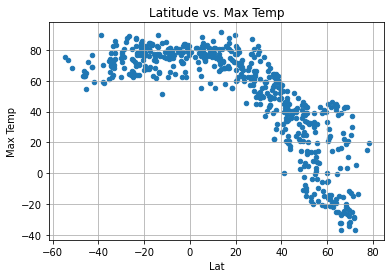

In [70]:
Temp_Data_plt = Clean_Data.plot(kind="scatter",x='Lat',y='Max Temp',title="Latitude vs. Max Temp",grid=True)
plt.savefig("../output_data/LatTemp.png")

## Latitude vs. Humidity Plot

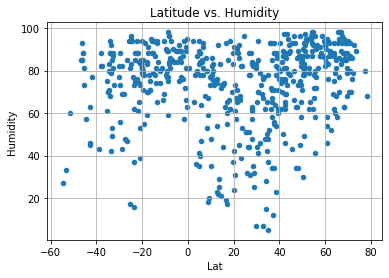

In [71]:
Humidity_Data = Clean_Data.plot(kind="scatter",x='Lat',y='Humidity',title='Latitude vs. Humidity',grid=True)
plt.savefig("../output_data/LatHumidity.png")

## Latitude vs. Cloudiness Plot

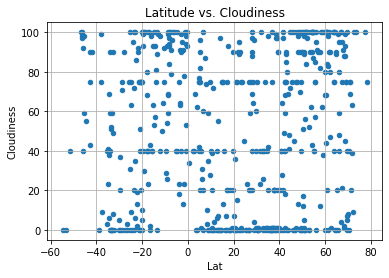

In [72]:
Cloudiness_Data = Clean_Data.plot(kind="scatter",x='Lat',y='Cloudiness',title='Latitude vs. Cloudiness',grid=True)
plt.savefig("../output_data/LatCloudiness.png")

## Latitude vs. Wind Speed Plot

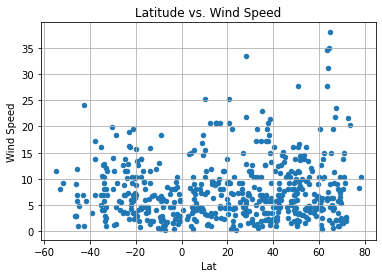

In [74]:
Wind_Data = Clean_Data.plot(kind="scatter",x='Lat',y='Wind Speed',title='Latitude vs. Wind Speed',grid=True)
plt.savefig("../output_data/LatWind.png")

## Linear Regression

In [76]:
North_Data = Clean_Data[Clean_Data['Lat']>=0]
South_Data = Clean_Data[Clean_Data['Lat']<0]
print(North_Data)
print(South_Data)

                 City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0                Hilo  19.7297 -155.0900     72.00        83          90   
2                Faya  18.3851   42.4509     55.40        62           0   
3              Barrow  71.2906 -156.7887    -14.80        70          20   
6               Khovd  48.0056   91.6419      2.89        34          13   
10           Tateyama  34.9833  139.8667     44.01        37          42   
..                ...      ...       ...       ...       ...         ...   
556        Nouadhibou  20.9310  -17.0347     62.60        67           0   
557  Praia da Vitória  38.7333  -27.0667     59.00        88          20   
558         Ekibastuz  51.6667   75.3667      4.98        94         100   
559           Margate  51.3813    1.3862     43.00        89           0   
560            Gewanē  10.1664   40.6453     77.05        35           0   

     Wind Speed Country        Date  
0          4.61      US  1614470051  
2         1

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

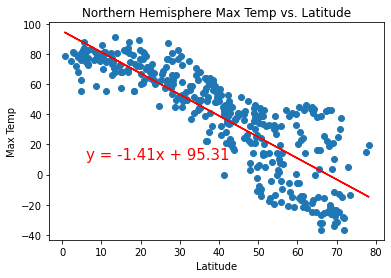

<Figure size 432x288 with 0 Axes>

In [82]:
X_Value = North_Data['Lat']
Y_Value = North_Data['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(X_Value, Y_Value)
Regress_Value = X_Value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(X_Value,Y_Value)
plt.plot(X_Value,Regress_Value,"r")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Northern Hemisphere Max Temp vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()
plt.savefig("../output_data/NorthHemTempVsLat.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

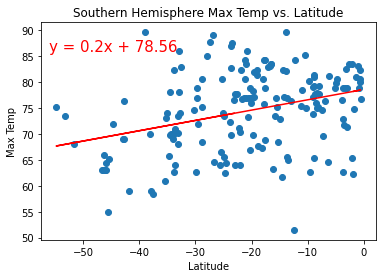

<Figure size 432x288 with 0 Axes>

In [87]:
X_Value = South_Data['Lat']
Y_Value = South_Data['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(X_Value, Y_Value)
Regress_Value = X_Value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(X_Value,Y_Value)
plt.plot(X_Value,Regress_Value,"r")
plt.annotate(line_eq,(-56,86),fontsize=15,color="red")
plt.title('Southern Hemisphere Max Temp vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()
plt.savefig("../output_data/SouthHemTempVsLat.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

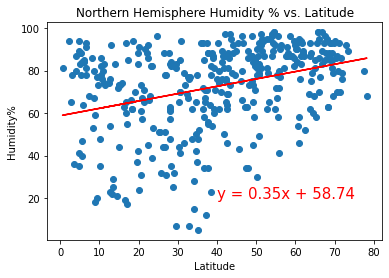

<Figure size 432x288 with 0 Axes>

In [93]:
X_Value = North_Data['Lat']
Y_Value = North_Data['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(X_Value, Y_Value)
Regress_Value = X_Value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(X_Value,Y_Value)
plt.plot(X_Value,Regress_Value,"r")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.title('Northern Hemisphere Humidity % vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity%')
plt.show()
plt.savefig("../output_data/NorthHemHumVsLat.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

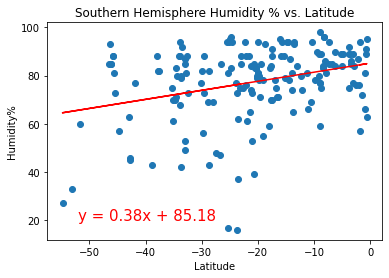

<Figure size 432x288 with 0 Axes>

In [97]:
X_Value = South_Data['Lat']
Y_Value = South_Data['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(X_Value, Y_Value)
Regress_Value = X_Value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(X_Value,Y_Value)
plt.plot(X_Value,Regress_Value,"r")
plt.annotate(line_eq,(-52,20),fontsize=15,color="red")
plt.title('Southern Hemisphere Humidity % vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity%')
plt.show()
plt.savefig("../output_data/SouthHemHumVsLat.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

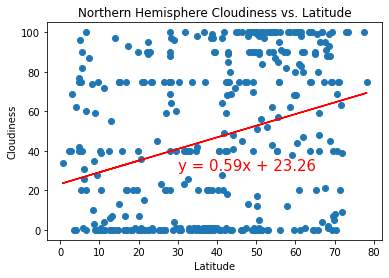

<Figure size 432x288 with 0 Axes>

In [101]:
X_Value = North_Data['Lat']
Y_Value = North_Data['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(X_Value, Y_Value)
Regress_Value = X_Value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(X_Value,Y_Value)
plt.plot(X_Value,Regress_Value,"r")
plt.annotate(line_eq,(30,30),fontsize=15,color="red")
plt.title('Northern Hemisphere Cloudiness vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()
plt.savefig("../output_data/NorthHemCloudVsLat.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

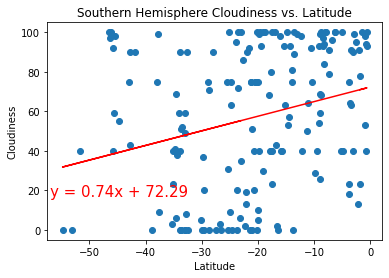

<Figure size 432x288 with 0 Axes>

In [117]:
X_Value = South_Data['Lat']
Y_Value = South_Data['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(X_Value, Y_Value)
Regress_Value = X_Value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(X_Value,Y_Value)
plt.plot(X_Value,Regress_Value,"r")
plt.annotate(line_eq,(-57,17),fontsize=15,color="red")
plt.title('Southern Hemisphere Cloudiness vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()
plt.savefig("../output_data/SouthHemCloudVsLat.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

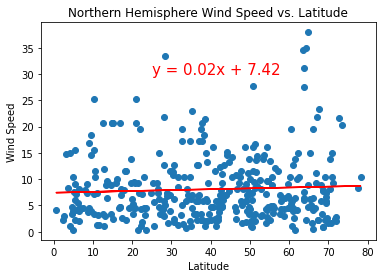

<Figure size 432x288 with 0 Axes>

In [109]:
X_Value = North_Data['Lat']
Y_Value = North_Data['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(X_Value, Y_Value)
Regress_Value = X_Value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(X_Value,Y_Value)
plt.plot(X_Value,Regress_Value,"r")
plt.annotate(line_eq,(25,30),fontsize=15,color="red")
plt.title('Northern Hemisphere Wind Speed vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()
plt.savefig("../output_data/NorthHemWindVsLat.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

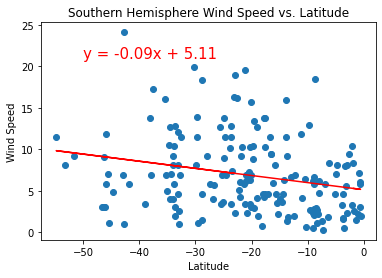

<Figure size 432x288 with 0 Axes>

In [115]:
X_Value = South_Data['Lat']
Y_Value = South_Data['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(X_Value, Y_Value)
Regress_Value = X_Value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(X_Value,Y_Value)
plt.plot(X_Value,Regress_Value,"r")
plt.annotate(line_eq,(-50,21),fontsize=15,color="red")
plt.title('Southern Hemisphere Wind Speed vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()
plt.savefig("../output_data/SouthHemWindVsLat.png")